# Q Learning - FrozenLake
original post : [Simple Reinforcement Learning with tensorflow Part 0](https://awjuliani.medium.com/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)

**Note**: Replacing gym with gymnasum



## Q Table Learning

### What is Q-Learning?
Q-Learning is a type of Reinforcement Learning where the agent:
1. Learns by **exploring the environment**.
2. Tries different actions to see which one gives **better rewards**.
3. Updates a table called `Q[state, action]` that keeps track of how good each action is in each state.


### What is the difference between **Slippery** and **Non-Slippery**

`is_slippery=True` (Default behavior)
- The agent can slip on the ice when moving.
- Example: If it tries to move **right**, it might randomly end up going **down** or **left**.
- **Harder to learn**, because the same action doesn’t always lead to the same result (i.e., it’s _stochastic_ or _random_). 

`is_slippery=False` (Deterministic behavior)
- The agent always goes **exactly where it wants**.
- If it chooses **right**, it moves **right** — no slipping.
- **Easier to learn**, because the environment is _predictable_.

In this example we will look at both `is_slippery=True` and `is_slippery-False`

### Import Libraries

In [35]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

### define function to train Q-Learning agent

In [38]:
def run_q_learning(is_slippery, num_episodes=2000):
  # create environment with or without slipping
  env = gym.make('FrozenLake-v1', is_slippery=is_slippery)
  n_states = env.observation_space.n
  n_actions = env.action_space.n
  # initialize Q-Table with all zeroes
  Q = np.zeros((n_states, n_actions))

  lr = 0.8      # Learning rate
  gamma = 0.95  # Discount factor
  rewards = []  # To track rewards per episode

  # start the training loop
  for i in range(num_episodes):
    # start a new episode, here s is starting state
    s, _ = env.reset()
    total_reward = 0
    done = False
    step = 0

    while step < 99:
      step += 1
      # choose the best action, add some randomness at the begining
      # the randomness reduces over time (1 / (i + 1))
      a = np.argmax(Q[s, :] + np.random.randn(1, env.action_space.n) * (1. / (i + 1)))
      # from the action `a`
      # 1. s1: new state
      # 2. r: reward (0 or 1)
      # 3. terminated/truncated: did the episode end
      s1, r, terminated, truncated, _ = env.step(a)
      done = terminated or truncated

      # Q-Learning formula
      # It adjusts the current Q[s, a] based on:
      # 1. Reward r
      # 2. Best future reward np.max(Q[s1, :])
      # 3. Learning rate lr and discount factor y
      Q[s, a] = Q[s, a] + lr * (r + gamma * np.max(Q[s1, :]) - Q[s, a])
      total_reward += r
      # Move to the next state
      # if the episode is over exit loop
      s = s1
      if done:
        break

    rewards.append(total_reward)

  return Q, rewards, env


### Run Q-Learning for both slippery and non-slippery envirnments

In [39]:
Q_non_slippery, rewards_non_slippery, env_non_slippery = run_q_learning(is_slippery=False)
Q_slippery, rewards_slippery, env_slippery = run_q_learning(is_slippery=True)

### Plot the rewards

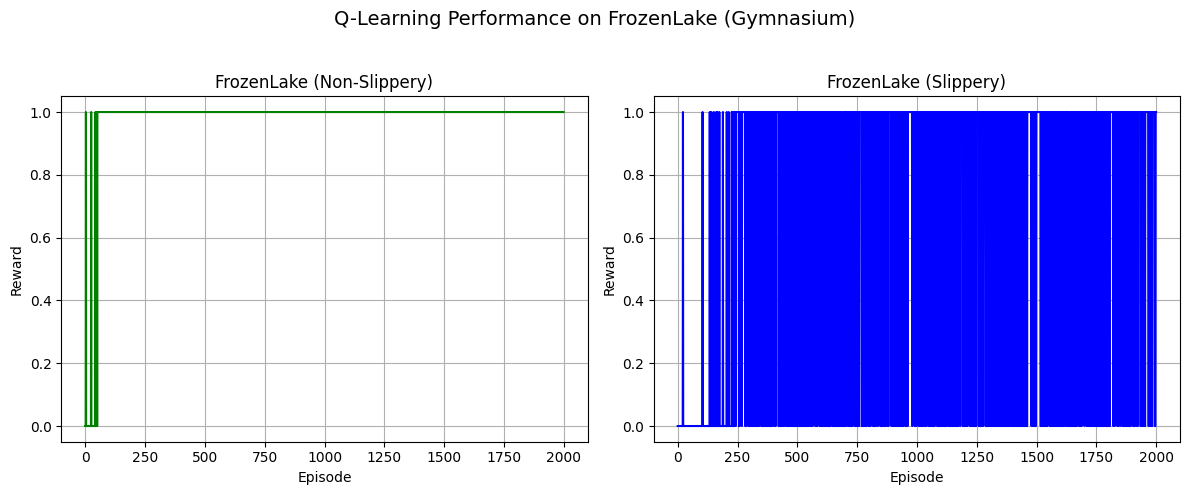

In [40]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rewards_non_slippery, color='green')
plt.title("FrozenLake (Non-Slippery)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(rewards_slippery, color='blue')
plt.title("FrozenLake (Slippery)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)

plt.suptitle("Q-Learning Performance on FrozenLake (Gymnasium)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Summary

| **Feature**           | **Non-Slippery (`False`)** | **Slippery (`True`)**    |
| --------------------- | -------------------------- | ------------------------ |
| Moves are predictable | Yes                      | No (random slip)       |
| Learning is easier    | Yes                      | No (slower learning)   |
| Realistic?            | Less (ideal case)        | More (like real world) |


### Visualizing Policy

In [43]:
action_symbols = ['←', '↓', '→', '↑']

def visualize_policy(Q, env, is_slippery=True):
  policy = np.argmax(Q, axis=1)
  size = int(np.sqrt(env.observation_space.n))
  grid = np.array([action_symbols[a] for a in policy]).reshape((size, size))

  print(f'Final learned policy grid ({is_slippery}):\n')
  for row in grid:
    print(' '.join(row))


In [44]:
visualize_policy(Q_non_slippery, env_non_slippery, False)

print("\n" + "="*40 + "\n")

visualize_policy(Q_slippery, env_slippery)

Final learned policy grid (False):

↓ ← ← ←
↓ ← ← ←
→ → ↓ ←
← ← → ←


Final learned policy grid (True):

← ↑ ↑ ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←


### How Q-Learning Works

#### 1. Initialize the Q-table

```
Q = np.zeroes([num_states, num_actions])
```

Here we are initializing a 4x4 array - giving us
- FrozenLake = 4x4 grid = 16 cells
- each cell is a state
- In each state the agent can choose from 4 
- np.zeroes([16, 4])

##### What is Q-table
Q is 16x4 table

for below policy grid
|     |     |     |     |
|-----|-----|-----|-----|
| →   | ↓   | →   | ↓   |
| →   | ↓   | ↓   | ↓   |
| →   | →   | ↓   | ↓   |
| →   | →   | →   | →   |


We get the Q-table
| State | Left (0) | Down (1) | Right (2) | Up (3) | Best Action |
| ----- | -------- | -------- | --------- | ------ | ----------- |
| 0     | 0.0      | 0.0      | **1.0**   | 0.0    | →           |
| 1     | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 2     | 0.0      | 0.0      | **1.0**   | 0.0    | →           |
| 3     | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 4     | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 5     | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 6     | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 7     | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 8     | 0.0      | 0.0      | **1.0**   | 0.0    | →           |
| 9     | 0.0      | 0.0      | **1.0**   | 0.0    | →           |
| 10    | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 11    | 0.0      | **1.0**  | 0.0       | 0.0    | ↓           |
| 12    | 0.0      | 0.0      | **1.0**   | 0.0    | →           |
| 13    | 0.0      | 0.0      | **1.0**   | 0.0    | →           |
| 14    | 0.0      | 0.0      | **1.0**   | 0.0    | →           |
| 15    | 0.0      | 0.0      | **1.0**   | 0.0    | → (goal)    |


#### 2. For each episode (or game)
Loop over multiple episodes , letting agent learn little by little

#### 3. start a new episode
```
state = env.reset()
```
Start at the beginning of lake


#### 4. Choose an action
```
action = np.argmax(Q[state, :] + noise)
```

- choose best known action
- Add random noise to encourage exploration (greedy policy)

#### 5. Take the action
```
next_state, reward, done, _ = env.step(action)
```

The env returns
- the next state
- the reward (usually 0 or 1)
- whether the episode has ended (done)

#### 6. Update the Q-table
```
Q[state, action] += lr * (reward + gamma * max(Q[next_state]) - Q[state, action])
```

This is the core learning rule base on Bellman equation
- Q[state, action] : current guess for how good this action is
- reward: what you get immediately
- max(Q[next_state]) : Best guess of future reward from next state
- gamma : Discount factor (importance of future reward)
- lr (learning rate) : How quickly the beliefs are uodated


#### 7. Repeat until done
Keep doing  steps 4 - 6 until the agent falls ina hole, reaches the goal  or runs out of steps.

#### 8. Repeat for many episodes
Over thousand of episodes, the agent learns from its success and failure , and the Q table becomes smarter


### Whay does Q-learning work

- It balances exploration and exploitation
- It propagates rewards backward - even if the reward is after 10 step, it updates earlier actions
- It does not need to know the model - only experience

### What the policy grid tell us

A policy is a mapping from state to action - it tells the agent
- if you are in this state, take this action

The grid visualizes the learned policy over 4x4 map of FrozenLake

Each cell in the grid shows the best action (←, ↑, ←, ↓)

For state(0) Top-Left - best action ↓ (Final learned policy grid (False))


### Understanding Bellman equation in our logic

#### Bellman Equation in Q-Learning Code

The **Bellman Equation** is the foundation of many reinforcement learning algorithms. For **Q-learning**, the update rule is:

![Bellman equation](bellman-equation.png)

| Symbol                | Meaning                                                         |
| --------------------- | --------------------------------------------------------------- |
| $Q(s, a)$             | Current estimate of the value of taking action $a$ in state $s$ |
| $\alpha$              | Learning rate (how much to update the estimate)                 |
| $r$                   | Reward received after taking action $a$                         |
| $\gamma$              | Discount factor (how much future rewards are valued)            |
| $s'$                  | New state after taking action $a$                               |
| $\max_{a'} Q(s', a')$ | Best expected future reward from new state $s'$                 |

##### How it appears in our code:

```python
Q[s, a] = Q[s, a] + lr * (r + y * np.max(Q[s1, :]) - Q[s, a])
```

![bellman mapping](bellman-mapping.png)



### Where it happens in code
```python
# choose action
a = np.argmax(Q[s, :] + np.random.randn(1, env.action_space.n) * (1. / (i + 1)))

# take action and observe result
s1, r, terminated, truncated, _ = env.step(a)

# Bellman update
Q[s, a] = Q[s, a] + lr * (r + y * np.max(Q[s1, :]) - Q[s, a])

# accumulate reward
total_reward += r
s = s1
```

## Q Learning with Neural Networks

Imagine trying to teach robot how to walk across frozen lake without slipping into holes - FrozenLake game.
Here instead of using Q-table - we are using neural network (one layer)
- What does the network do
  - The input to our network is the state - like where the robot is on the ice
  - Since FrozenLake has 16 possible tiles, we represent current tile with **1 x 16 one-hot vector** - basically a list of 16 numbers where only one of them is **1 (current tile)** and rest **0**
  - This goes into neural network as input and outputs a list of 4 numbers - one for each possible move [Up, Right, Down, Left], These numbers are the Q values or how good is the move in the situation.

- How does it learn
  - In Q-table just plug in new value based on some math.
  - With neural network - no values are updated directly, Instead we use somthing called backpropagation
    - figure out what the network should have predicted - Q-target (based on reward and future estimate)
    - compare it with what network actually predicted 
    - difference between Q-target and what network actually predicted is error
    - feed the error backward through the network to nudge the weights using gradient descent

  - What's the loss function
    - we're using **sum of square loss**: Imagine squaring the error for each action, then add them up  
      loss = ∑(Q-target - Q)²
    - it punishes the network more for being very wrong and less if it's little wrong

    
  **To Summarize**
  - Replace basic Q-table with simple neural network
  - It still learns Q-values, but it does through training, and not manual updates
  - This setup makes it easy to scale up to more complex problems
  - Learning is done through **backpropagation and loss funtions**, not direct value replacement

### Import libraries

In [13]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [12]:
import tensorflow as tf  # pylint: disable=unused-import

ImportError: DLL load failed while importing _pywrap_tfe: The specified module could not be found.